# Introducción a regresión lineal 
En esta notebook aprenderemos qué es una regresión lineal y cómo funciona con un ejemplo en Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.

## Importando datos

In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv("./../data/raw/housing.data", header = None, sep = "\s+" )

In [29]:
df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]





In [30]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Entendiendo los datos
Una vez descargados los datos lo que hay que hacer es entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que yo recomiendo que empecemos viendo un gráfico de correlaciones usando pairplot de Seaborn.

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

 Descripción de las columnas a analisar en el conjunto de datos de viviendas de Boston:

1. "CRIM": Esta columna representa la tasa de criminalidad per cápita por ciudad. Mide la tasa de criminalidad en la ciudad donde se encuentra la vivienda.

2. "INDUS": Esta columna se refiere a la proporción de acres de negocios no minoristas por ciudad. Indica la proporción de terreno industrial en la ciudad.

3. "RM": Esta columna representa el número promedio de habitaciones por vivienda. Mide el tamaño promedio de las viviendas en la ciudad.

4. "DIS": Esta columna indica la distancia ponderada a los centros de empleo en Boston. Mide la accesibilidad a lugares de trabajo en la ciudad.

5. "MEDV": Esta columna representa el valor medio de las viviendas ocupadas por sus propietarios en miles de dólares. Es una de las variables objetivo en el conjunto de datos y se utiliza a menudo como el valor objetivo a predecir en modelos de regresión.

Estas son algunas de las características clave del conjunto de datos de viviendas de Boston. Cada una de estas columnas proporciona información importante sobre las viviendas y su entorno en diferentes áreas de Boston.

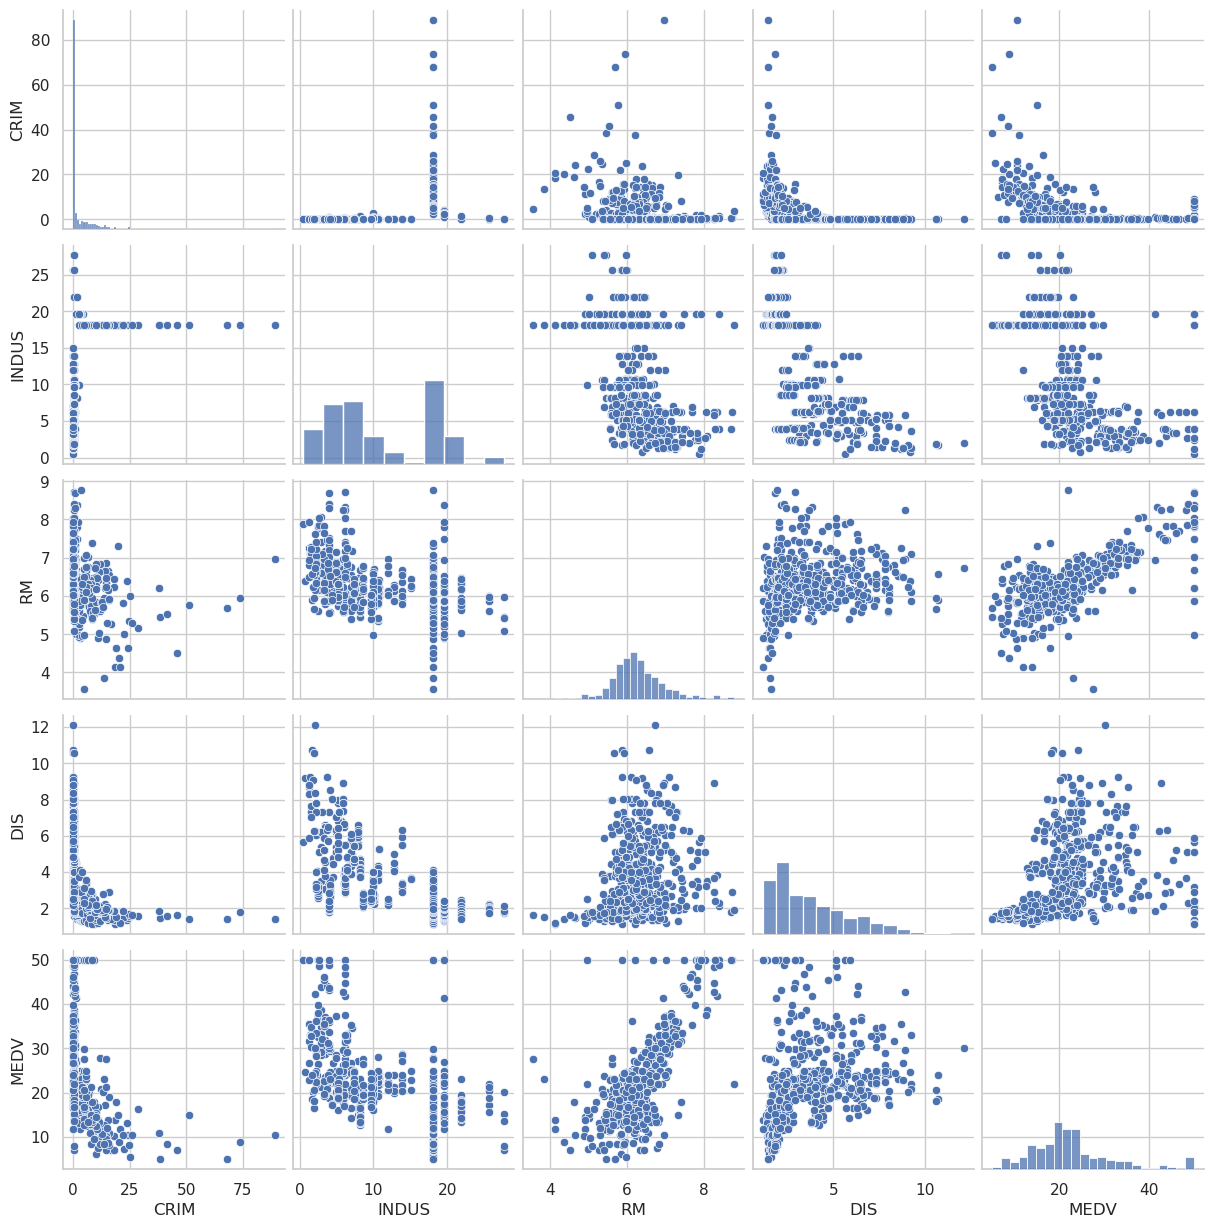

In [32]:
# Configuración del estilo y contexto de seaborn para el gráfico.
sns.set(style="whitegrid", context="notebook")

# Selección de columnas para el gráfico de pares.
cols = ["CRIM", "INDUS", "RM", "DIS", "MEDV"]

# Creación de un gráfico de pares utilizando las columnas seleccionadas.
sns.pairplot(data=df[cols], height=2.5)
plt.show()


Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar un método numérico para poder entender las correlaciones. 

In [33]:
import numpy as np


<AxesSubplot: >

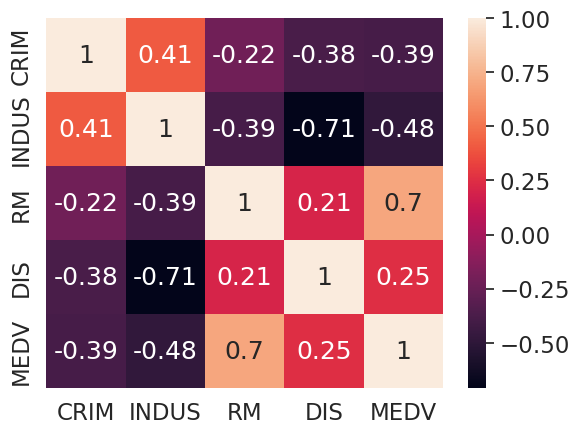

In [34]:
# Cálculo de la matriz de correlación entre las columnas seleccionadas.
cm = np.corrcoef(df[cols].values.T)

# Configuración del tamaño de fuente para el gráfico de calor.
sns.set(font_scale=1.5)

# Creación de un mapa de calor (heatmap) utilizando la matriz de correlación.
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)


<AxesSubplot: >

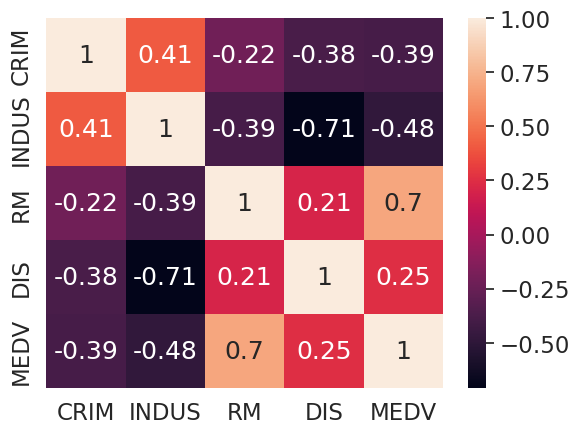

In [35]:
# Utilizando menos información se llego al mismo plot. 
sns.heatmap(df[cols].corr(), annot =True)

## Creando modelo con scikit-learn

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [37]:
# Definimos las variables (X, y)
X = df["RM"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)

# Escalamos las variables (X, y)
sc_x = StandardScaler()  # Inicializa un objeto para escalar las características (X)
sc_y = StandardScaler()  # Inicializa un objeto para escalar la variable objetivo (y)

X_std = sc_x.fit_transform(X)  # Escala las características y las almacena en X_std
y_std = sc_y.fit_transform(y)  # Escala la variable objetivo y la almacena en y_std


In [38]:
# Declaramos y ajustamos el modelo de Regresión Lineal
slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

## Análisis de resultados

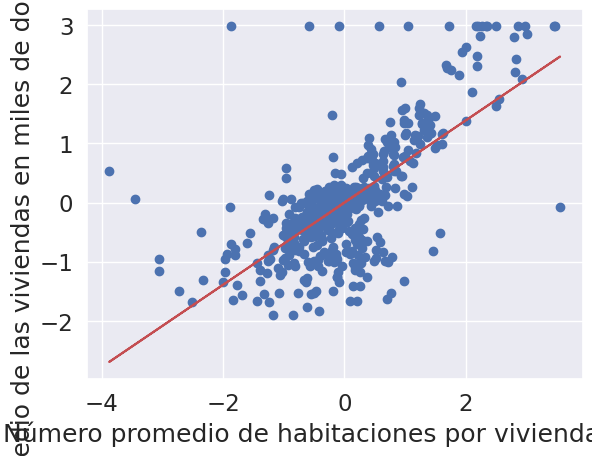

In [39]:
# Crear un gráfico de dispersión y una línea de regresión
plt.scatter(X_std, y_std)  # Crear un gráfico de dispersión de las características escaladas (X_std) y la variable objetivo escalada (y_std)
plt.plot(X_std, slr.predict(X_std), color="r")  # Crear una línea de regresión roja utilizando las características escaladas y las predicciones del modelo

# Configurar etiquetas y título
plt.ylabel("Valor medio de las viviendas en miles de dólares (MEDV)")  # Etiqueta del eje y
plt.xlabel("Número promedio de habitaciones por vivienda (RM)")  # Etiqueta del eje x

plt.show()  


In [40]:
colum_rm = X_std[:,0]
colum_x_predic = slr.predict(X_std)[:,0]

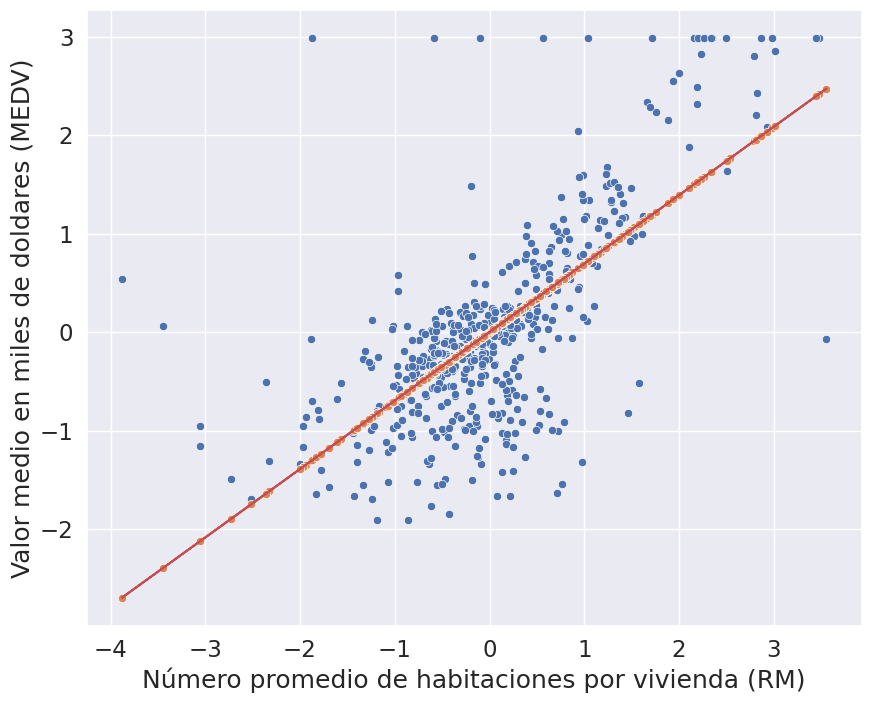

In [41]:
# Plot ralizado utilizando seaborn
plt.figure(figsize = (10,8))
sns.scatterplot(x = X_std[:,0] , y = y_std[:,0],)
plt.plot(X_std, slr.predict(X_std), color = "r")
sns.scatterplot(x = colum_rm , y = colum_x_predic)
plt.ylabel("Valor medio en miles de doldares (MEDV)")
plt.xlabel("Número promedio de habitaciones por vivienda (RM)")
plt.show()

## Generando predicción con el modelo

In [42]:
# Se define el número de habitaciones para predecir el precio de una casa.
room_num = 5

# Se estandariza el número de habitaciones utilizando la misma escala que se usó para entrenar el modelo.
room_num_std = sc_x.transform(np.array([[room_num]])) 

# Se realiza una predicción del precio de una casa con el número especificado de habitaciones utilizando el modelo de regresión lineal.
cost = sc_y.inverse_transform(slr.predict(room_num_std))

print("El precio de una casa con 5 habitaciones en Boston es de:\n", cost[0, 0])





El precio de una casa con 5 habitaciones en Boston es de:
 10.839924129462984
